In [5]:
!pip uninstall soonermesopy

Found existing installation: soonermesopy 0.1.0
Uninstalling soonermesopy-0.1.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/soonermesopy-0.1.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/soonermesopy/*
Proceed (Y/n)? y
  Successfully uninstalled soonermesopy-0.1.0


In [1]:
!pip install git+https://github.com/FloresArturo/soonermesopy

  Cloning https://github.com/FloresArturo/soonermesopy to /tmp/pip-req-build-v3ugnsxi
  Running command git clone --filter=blob:none --quiet https://github.com/FloresArturo/soonermesopy /tmp/pip-req-build-v3ugnsxi
  Resolved https://github.com/FloresArturo/soonermesopy to commit 11b765f63efacb369c31e397966c3f00994ef30f
  Preparing metadata (setup.py) ... done


#Tutorial to using *soonermesopy*

## Intro

*soonermesopy* is a Python package to facilitate downloading data from the Oklahoma Mesonet network. The ```pandas``` library is used to download and manipulate data as DataFrames.

Use the following to install from:
- Terminal
```cmd
pip install git+https://github.com/FloresArturo/soonermesopy
```
- Google Colab
```cmd
!pip install git+https://github.com/FloresArturo/soonermesopy
```

The available functions include:
- generate_date()
- retrieve_geoinfo()
- retrieve_hydraulic_params()
- retrieve_daily_summary()
- retrieve_monthly_summary()

In [2]:
# after installing, load it (and pandas)
from soonermesopy import *
import pandas as pd

## Stations' geographic information

It is possible to retrieve the location and soil texture from all stations. To do so, we use:

In [3]:
# To load all of the stations information
geoinfo = retrieve_geoinfo()
geoinfo.head()

,Number,Site,Name,City,County,nLat,eLon,Elev,TEXT5,TEXT10,TEXT25,TEXT60,TEXT75,Commission,Decommission
0,110,ACME,Acme,Rush Springs,Grady,34.80833,-98.02325,397,Sandy Loam,NaN,Sandy Loam,Sandy Clay Loam,Sandy Clay Loam,19940101,20991231
1,1,ADAX,Ada,Ada,Pontotoc,34.79851,-96.66909,295,Sandy Loam,NaN,Sandy Clay Loam,Sandy Clay Loam,Clay Loam,19940101,20991231
2,2,ALTU,Altus,Altus,Jackson,34.58722,-99.33808,416,Clay Loam,NaN,Silty Clay Loam,Silty Clay,Silty Clay,19940101,20991231
3,116,ALV2,Alva,Alva,Woods,36.70823,-98.70974,439,Clay Loam,NaN,Clay,Clay,-999,19981217,20991231
4,3,ALVA,Alva,Alva,Woods,36.77970,-98.67170,450,-999,-999,-999,-999,-999,19940101,19981216


In [4]:
# To load only one station
  # use 4 letter ID for the station
geoinfo = retrieve_geoinfo(station_id='ADAX')
geoinfo

,Number,Site,Name,City,County,nLat,eLon,Elev,TEXT5,TEXT10,TEXT25,TEXT60,TEXT75,Commission,Decommission
1,1,ADAX,Ada,Ada,Pontotoc,34.79851,-96.66909,295,Sandy Loam,NaN,Sandy Clay Loam,Sandy Clay Loam,Clay Loam,19940101,20991231


EXTRA: plot the stations

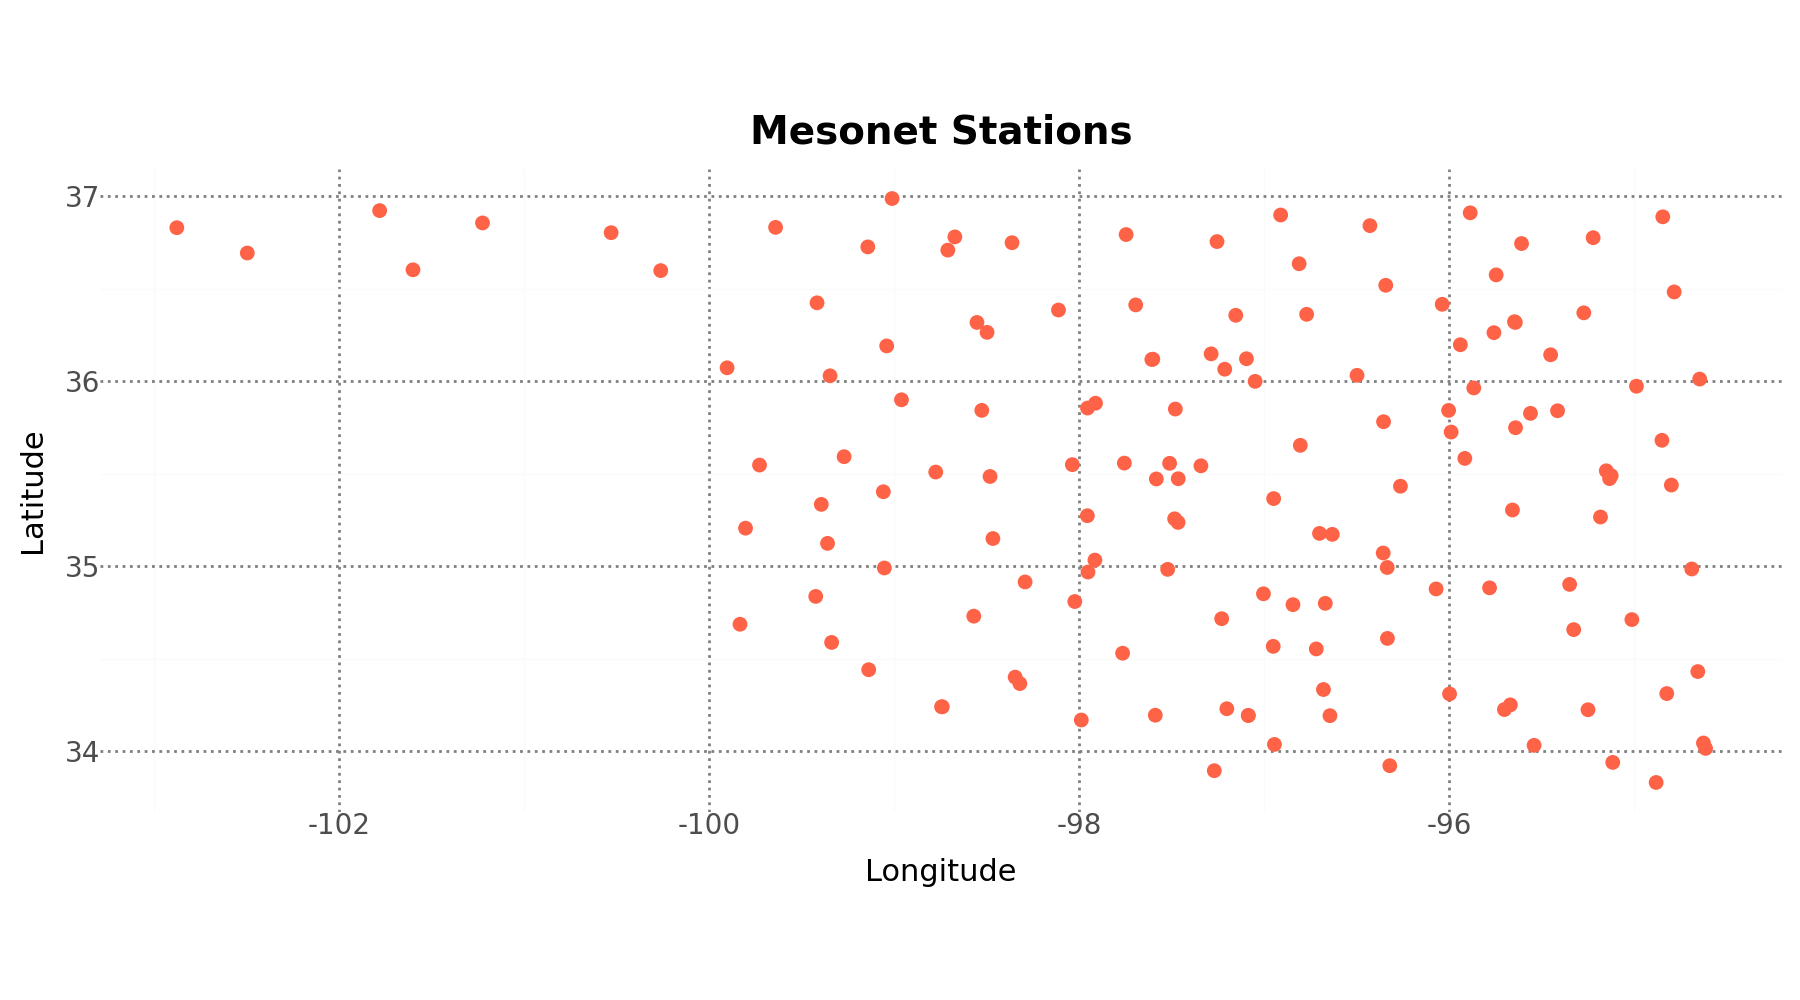

In [5]:
# 1 import libraries
from plotnine import *

# 2 load stations data
geoinfo = retrieve_geoinfo()

# 3 create plot
(
    ggplot(geoinfo) +
    geom_point(aes(x='eLon', y='nLat'), color='tomato', size=2)+
    coord_fixed()+
    theme_minimal() +
    labs(title='Mesonet Stations',
         x='Longitude',
         y='Latitude') +
    theme(
        figure_size=(9,5),
        panel_grid_major=element_line(color='gray', linetype='dotted'),
        axis_text=element_text(size=10),
        plot_title=element_text(size=14, weight='bold')
    )
)

## Climatic data

You can download daily or monthly data for a single station or for all stations. The available set of variables include:
- 'weather'         = temperature, humidity, precipitation, radiation, wind speed
- 'soil_moist'      = FC, WP, WHC, VWC, FAW, MP and Ks at 05, 25, and 60 cm
- 'soil_temp'       = temperatures under bare soil and native vegetation
- 'all'             = all available variables

### Daily data
Downloads data for the indicated variables for a single or all stations. Function:
- retrieve_daily_summary(station_id, date, variables)
  - station_id: four letter ID for the station of interest (if not given, by default it downloads all stations)
  - date: date object for the day of interest (if not given, by default it is yesterday)
  - variables: variables of interest, see above (if not given, by default it includes all available variables)

In [6]:
# when no input is given to the function (default all variables for all stations for yesterday)
d1 = retrieve_daily_summary()
d1.head()

,Site,Date,TMAX,TMIN,TAVG,HMAX,HMIN,HAVG,RAIN,ATOT,...,MP60,Ks05,Ks25,Ks60,BMIN,BMAX,SMAX,SMIN,S5MN,S5MX
0,ACME,2025-07-17,94.06,74.84,83.64,86.76,44.46,68.19,0.00,26.36,...,-60.028692,218.8,88.5,20.4,78.75,98.01,83.89,78.71,79.30,84.79
1,ADAX,2025-07-17,92.52,74.97,83.66,93.20,52.35,73.14,0.00,24.86,...,NaN,355.6,3.1,0.9,78.40,91.94,83.61,80.28,80.22,83.75
2,ALTU,2025-07-17,97.34,76.12,85.62,82.29,38.58,60.32,0.00,22.66,...,NaN,5.9,4.2,1.1,85.60,98.20,85.71,81.16,82.71,92.48
3,ALV2,2025-07-17,85.75,70.68,77.83,96.43,65.22,80.22,0.06,11.77,...,NaN,2.6,5.0,4.0,81.88,88.07,79.41,77.45,78.64,82.49
4,ANT2,2025-07-17,92.79,71.13,81.16,99.22,48.04,77.49,0.00,26.11,...,-6.108173,20.5,28.0,8.6,77.94,94.10,85.28,78.64,78.82,88.65


In [7]:
# Given station, given day, only soil moisture data
station_of_interest     = 'ADAX'
date_of_interest        = generate_date(2025,1,1)
variables_of_interest   = 'soil_moist'

d2 = retrieve_daily_summary(station_id=station_of_interest,
                            date=date_of_interest,
                            variables=variables_of_interest)
d2.transpose()

,1
Site,ADAX
Date,2025-01-01
FC05,0.196
FC25,0.26
FC60,0.301
WP05,0.088
WP25,0.147
WP60,0.181
WHC05,0.108
WHC25,0.113


### Monthly data

It is also possible to download monthly data for a station. Function:
- retrieve_monthly_summary(station_id, month, year, variables)
  - station_id: four letter id for the station of interest (mandatory)
  - month, year: date of interest (if not given, data for current month until yesterday)
  - variables: variables of interest, see above (if not given, all available are included)

In [8]:
# example 1
m1 = retrieve_monthly_summary()
m1

Retrieving 7/2025 ... : 100%|██████████| 17/17 [00:22<00:00,  1.31s/it]


,Site,Date,TMAX,TMIN,TAVG,HMAX,HMIN,HAVG,RAIN,ATOT,...,MP60,Ks05,Ks25,Ks60,BMIN,BMAX,SMAX,SMIN,S5MN,S5MX
0,ACME,2025-07-01,86.76,68.54,77.20,98.35,53.86,80.64,0.01,20.27,...,-23.915263,218.8,88.5,20.4,75.56,87.17,80.83,76.05,76.33,81.32
1,ADAX,2025-07-01,87.73,69.28,76.89,98.47,53.74,81.78,0.00,24.69,...,NaN,355.6,3.1,0.9,76.14,88.29,80.46,77.27,76.78,81.37
2,ALTU,2025-07-01,85.01,70.43,77.45,92.23,56.20,74.60,0.00,13.21,...,-34.395106,5.9,4.2,1.1,80.85,87.66,80.89,78.57,78.30,82.36
3,ALV2,2025-07-01,86.36,65.10,76.34,97.51,49.22,73.19,0.00,20.09,...,NaN,2.6,5.0,4.0,73.80,84.74,78.22,74.97,74.03,84.22
4,ANT2,2025-07-01,91.24,69.73,78.98,96.18,45.08,74.91,0.00,26.19,...,-13.599246,20.5,28.0,8.6,77.63,98.64,86.41,78.21,79.11,87.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,WILB,2025-07-17,92.34,70.93,82.17,96.59,51.66,74.43,0.00,24.80,...,-4.373059,18.8,6.3,35.2,79.43,89.56,81.32,78.37,78.35,82.85
113,WIST,2025-07-17,93.33,71.31,81.67,99.61,52.18,81.06,0.00,25.13,...,-4.675412,9.2,14.2,15.3,79.56,93.94,82.74,78.57,78.67,85.33
114,WOOD,2025-07-17,85.77,69.33,75.98,96.71,62.95,81.95,0.00,11.49,...,-377.667873,36.3,56.1,99.3,81.10,89.58,79.14,77.31,77.58,79.86
115,WYNO,2025-07-17,88.27,71.58,79.22,96.76,62.59,83.23,0.05,19.61,...,NaN,75.6,14.2,18.2,81.05,89.31,83.66,79.84,79.75,85.39


In [9]:
# example 2
# an annual summary for a given station of soil moisture
station_of_interest     = 'CENT'
variables_of_interest   = 'soil_moist'
year_of_interest        = 2014

data = pd.DataFrame()
for i in range(1,13):
  m = retrieve_monthly_summary(station_id   = station_of_interest,
                               month        = i,
                               year         = year_of_interest,
                               variables    = variables_of_interest)
  data = pd.concat([data, m])

data

Retrieving 12/2014 ... : 100%|██████████| 31/31 [00:32<00:00,  1.06s/it]


,Site,Date,FC05,FC25,FC60,WP05,WP25,WP60,WHC05,WHC25,...,VWC60,FAW05,FAW25,FAW60,MP05,MP25,MP60,Ks05,Ks25,Ks60
24,CENT,2014-01-01,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.338967,1.550121,1.928045,1.029565,-9.746172,-10.076593,-12.306638,19.4,30.7,1.8
24,CENT,2014-01-02,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.336950,1.560129,1.909376,1.017560,-9.426536,-10.418159,-13.599246,19.4,30.7,1.8
24,CENT,2014-01-03,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.335501,1.539901,1.890604,1.008933,-10.076593,-10.771244,-14.535037,19.4,30.7,1.8
24,CENT,2014-01-04,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.333965,1.550121,1.909376,0.999794,-9.746172,-10.418159,-15.534737,19.4,30.7,1.8
24,CENT,2014-01-05,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.334744,1.550121,1.928045,1.004428,-9.746172,-10.076593,-15.026636,19.4,30.7,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,CENT,2014-12-27,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.340211,1.598004,1.928045,1.036969,-8.249037,-10.076593,-11.513517,19.4,30.7,1.8
24,CENT,2014-12-28,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.336950,1.579502,1.946601,1.017560,-8.818238,-9.746172,-13.599246,19.4,30.7,1.8
24,CENT,2014-12-29,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.336950,1.588862,1.965033,1.017560,-8.528909,-9.426536,-13.599246,19.4,30.7,1.8
24,CENT,2014-12-30,0.237,0.174,0.334,0.084,0.07,0.166,0.153,0.104,...,0.336950,1.588862,1.928045,1.017560,-8.528909,-10.076593,-13.599246,19.4,30.7,1.8
